In [43]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader, random_split
import numpy as np
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import os
import shutil
import sounddevice as sd


- Changes: 
- Increase to 500 epochs

In [3]:
filepath = 'David/Tests/17'
script_dir = os.path.dirname('lstm.ipynb')
results_dir = os.path.join(script_dir, filepath + '/')

if not os.path.isdir(results_dir):
    os.makedirs(results_dir)

In [44]:
# Load Data

# Uncomment to save .npy file if not yet saved
#data =  np.loadtxt('./test_series.csv',delimiter=',',dtype=np.float32)
#np.save('test_series', data)
xy = np.load('./coin_data.npy')

In [45]:
mapping = {
       0:"1 cent",
       1:"2 cent",
       2:"5 cent",
       3:"20 cent",
       4:"50 cent",
       5:"100 cent",
       6:"200 cent"
}

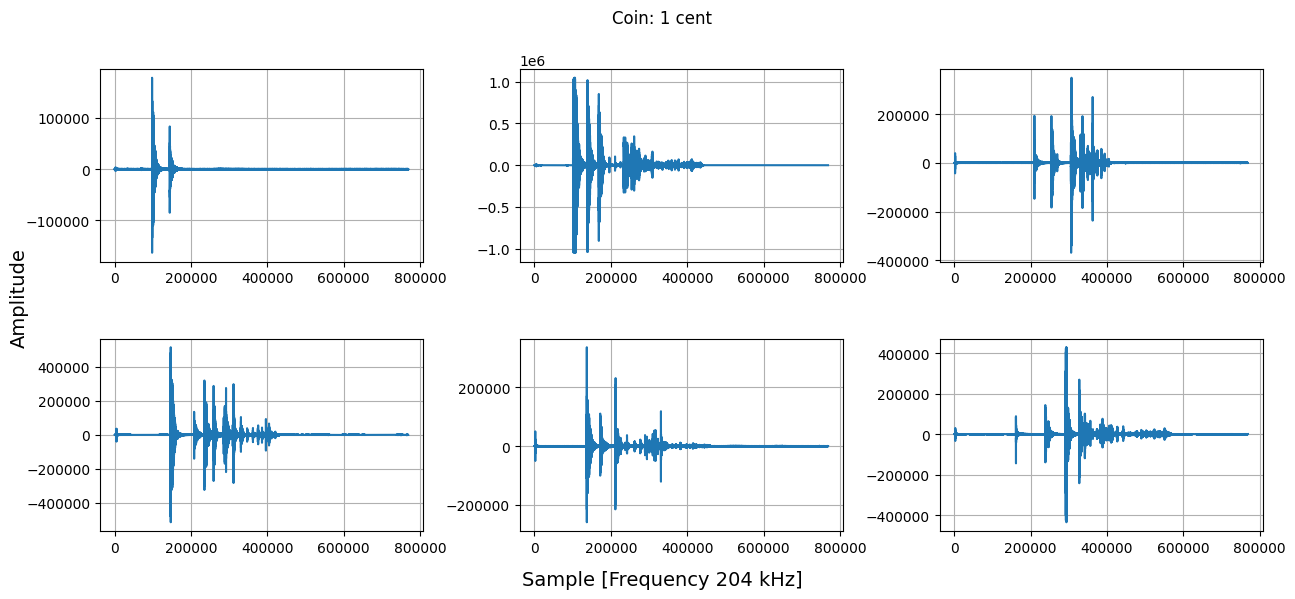

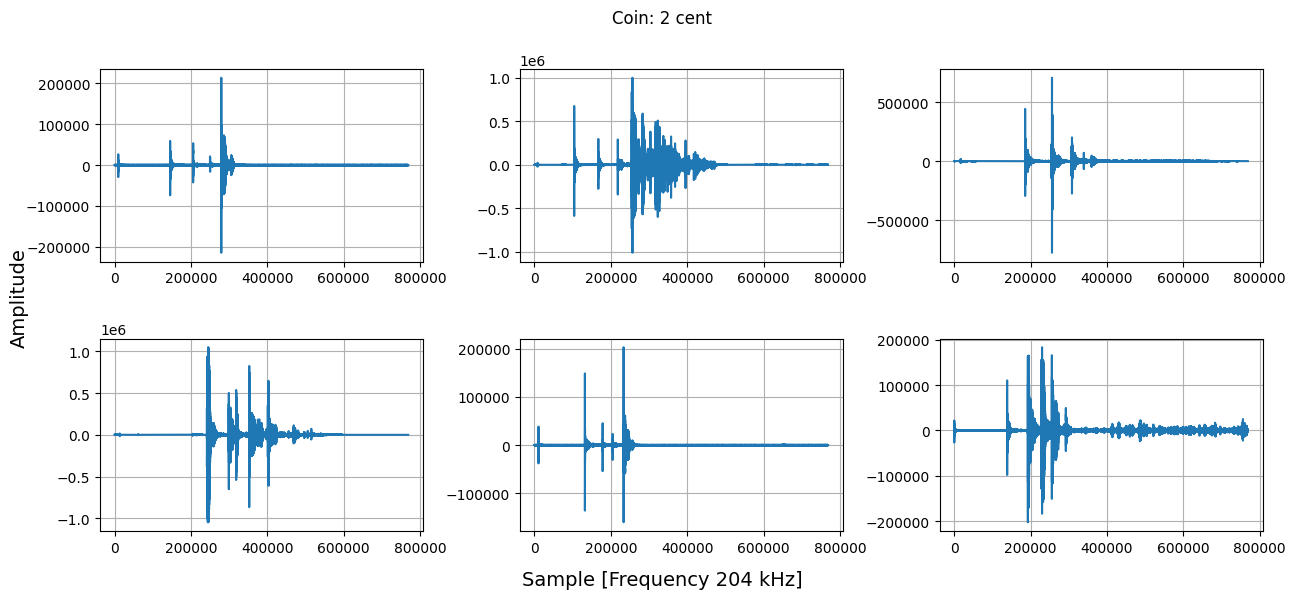

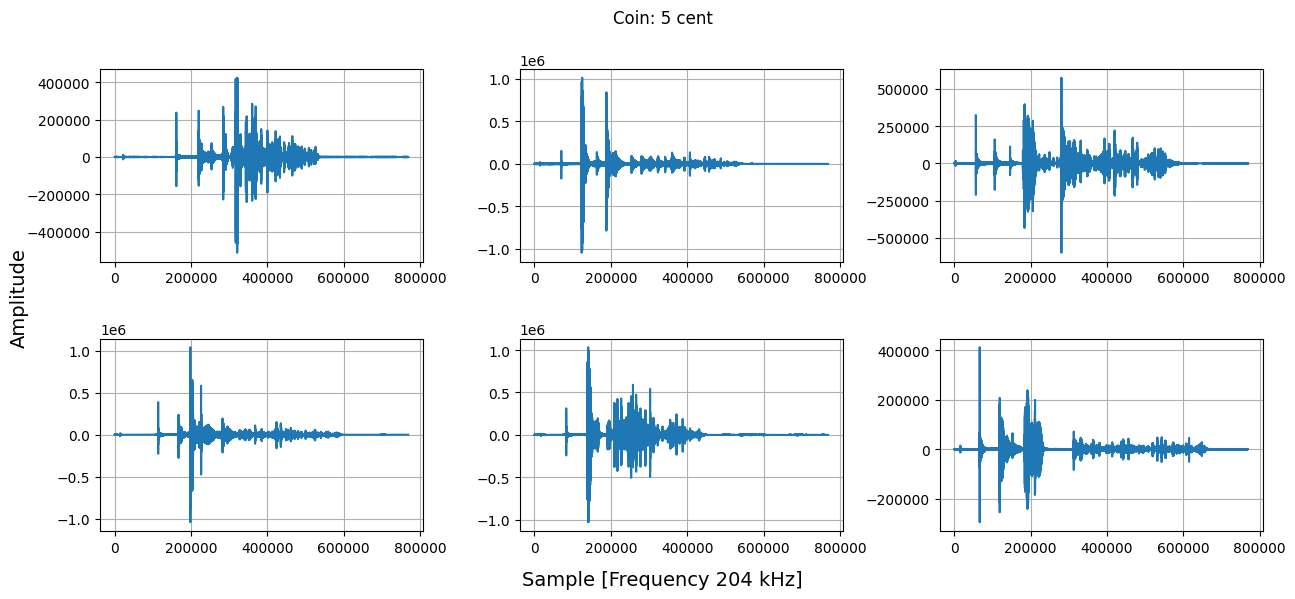

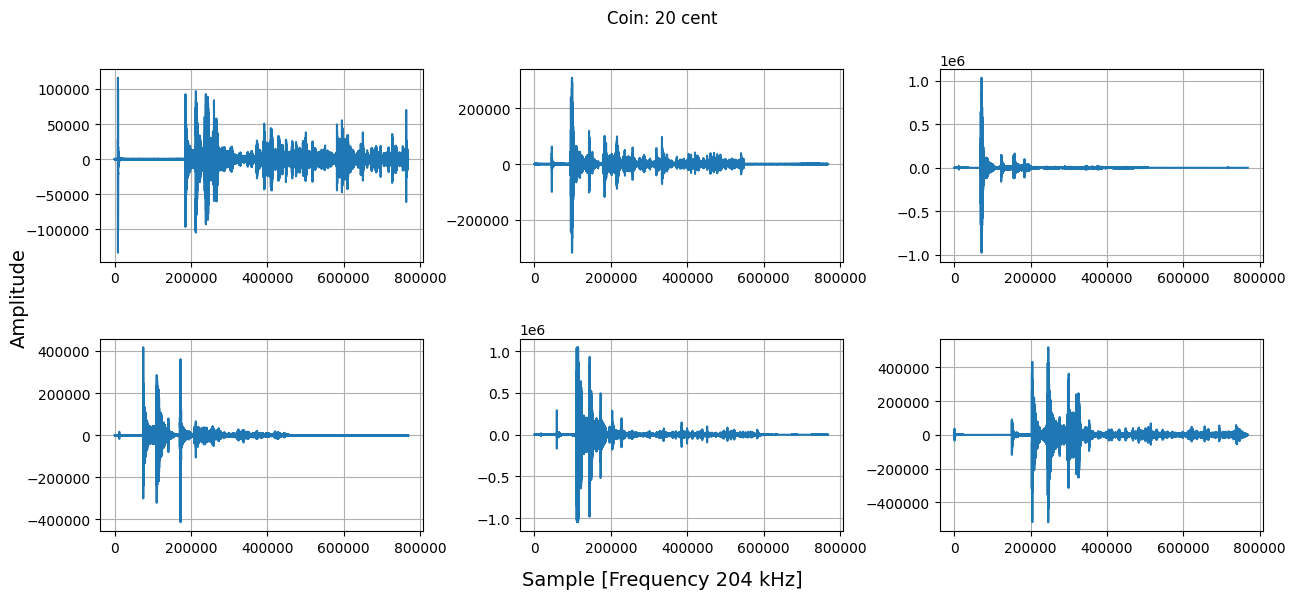

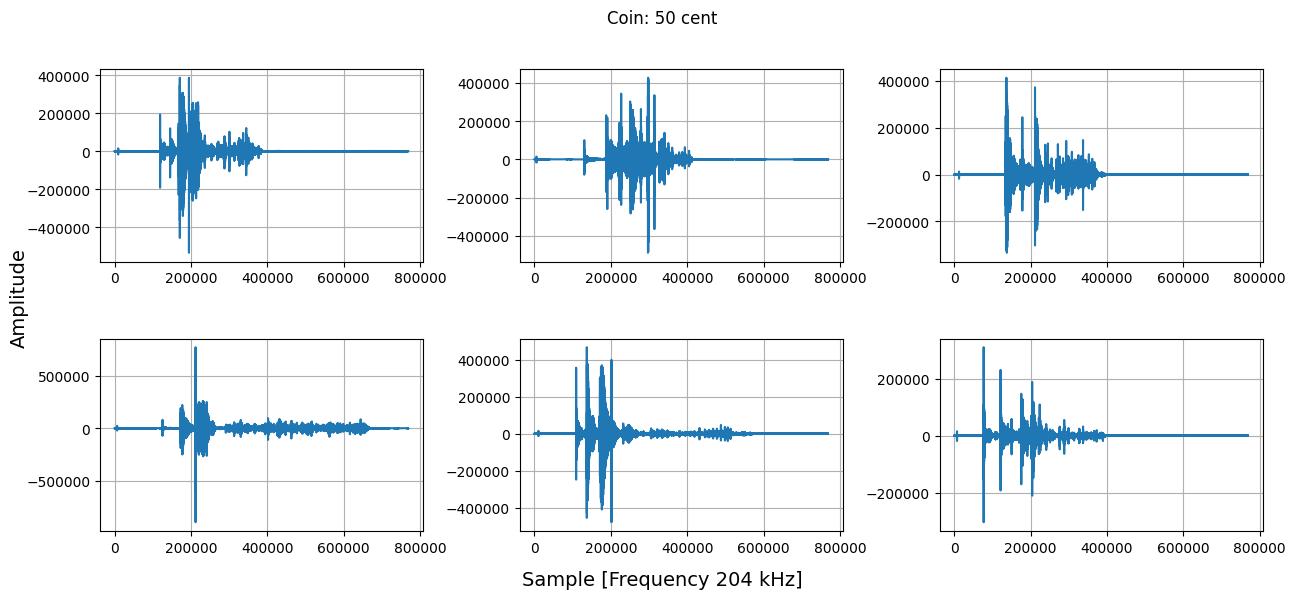

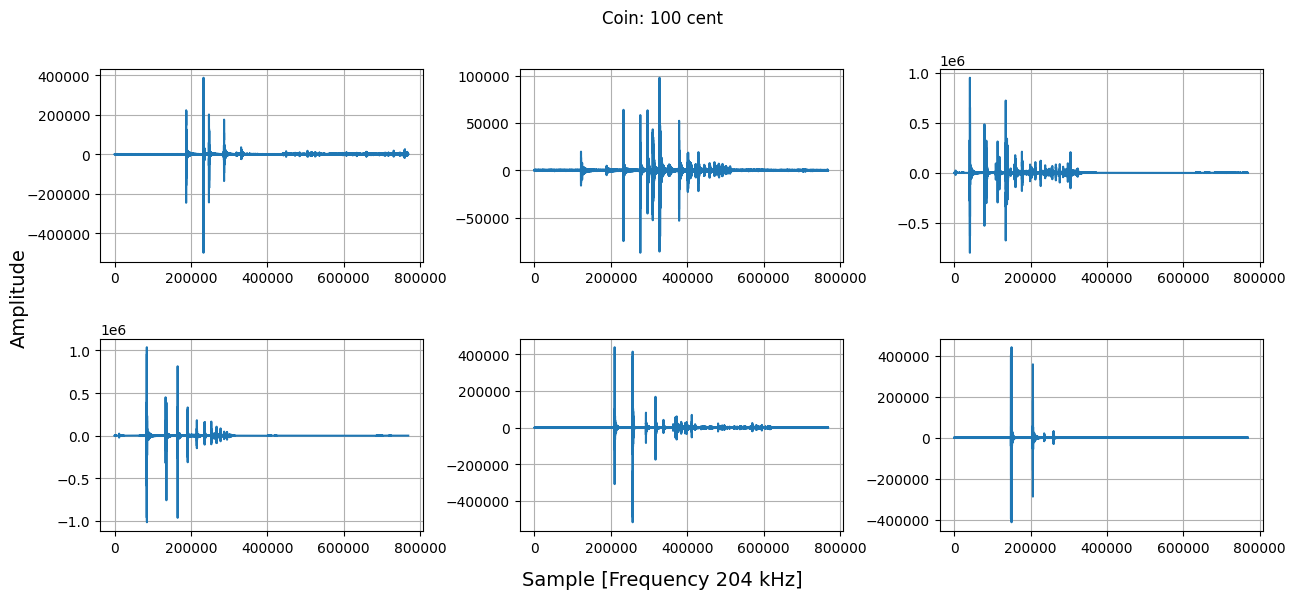

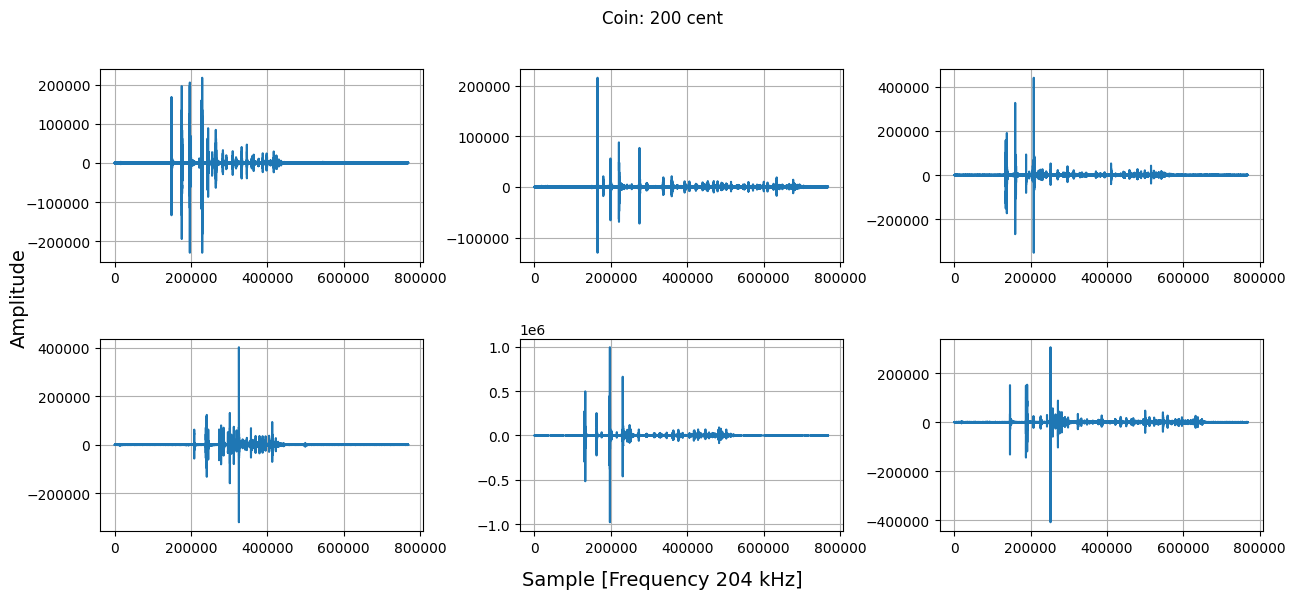

In [26]:
for i in range(7):
    index = []
    # Create subplots with shared x and y axes
    fig, axs = plt.subplots(2, 3, sharex=False, sharey=False, figsize=(15, 6))
    for m, ax in enumerate(axs.flat):  # Flatten axs array for iteration
        for j in range (xy.shape[0]):
            if (xy[j,0]) == i and j not in index:
                # Plot data dynamically
                ax.plot(xy[j,1:])
                ax.grid(True)
                index.append(j)
                break
    # Add global X and Y axis labels
    fig.text(0.5, 0.02, 'Sample [Frequency 204 kHz]', ha='center', fontsize=14)  # Global X label
    fig.text(0.065, 0.5, 'Amplitude', va='center', rotation='vertical', fontsize=14)  # Global Y label

    fig.subplots_adjust(wspace=0.3, hspace=0.4)
    plt.suptitle(f'Coin: {map[i]}')
    plt.show()


In [50]:
#sd.play(xy[5,1:], samplerate=204000)
#sd.wait()

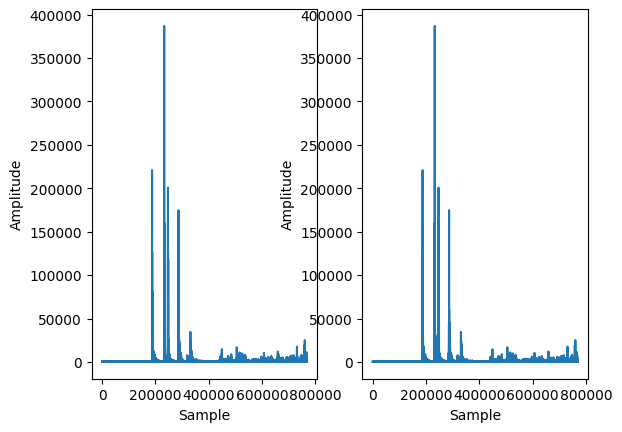

Number of samples per audio: 769024


In [53]:
fig , ax = plt.subplots(1,2,sharex=True)

X = xy[:,1:] # Indexes inputs

ax [0].plot(X[0])
ax [0].set_xlabel('Sample')
ax [0].set_ylabel('Amplitude')

# Turns negative values to 0
X[X < 0] = 0

ax [1].plot(X[0])
ax [1].set_xlabel('Sample')
ax [1].set_ylabel('Amplitude')

y = xy[:,0] # Indexes Labels

plt.show() 

print(f'Number of samples per audio: {X.shape[1]}')

In [ ]:
"""
def find_longest_important_section(data, threshold, exclude_first_n=20000):
    longest_section_length = 0
    longest_section_index = -1
    sections = []

    for i, row in enumerate(data):
        # Exclude the first `exclude_first_n` samples by slicing the row
        valid_indices = np.arange(exclude_first_n, len(row))
        valid_row = row[exclude_first_n:]  # Data after the exclusion point
        
        # Find indices where the data exceeds the threshold
        indices = np.where(valid_row > threshold)[0]

        if len(indices) > 0:
            # Adjust the indices to account for the exclusion offset
            start, end = indices[0] + exclude_first_n, indices[-1] + exclude_first_n
            section_length = end - start + 1
            
            # Save the section length and check if it's the longest
            sections.append((start, end, section_length))
            if section_length > longest_section_length:
                longest_section_length = section_length
                longest_section_index = i
        else:
            # No important section found
            sections.append((None, None, 0))
    
    return longest_section_index, longest_section_length, sections

threshold = 30000

# Find the longest important section
longest_index, longest_length, all_sections = find_longest_important_section(X, threshold)


print(f"Time series with the longest important section: {longest_index}")
print(f"Length of the longest important section: {longest_length}")
"""


Time series with the longest important section: 460
Length of the longest important section: 720629


In [ ]:
"""
def cut_and_pad_time_series(data, threshold, longest_section_length):
    processed_data = []

    for i, row in enumerate(data):
        # Find the first index where the data exceeds the threshold
        indices = np.where(row > threshold)[0]
        
        if len(indices) > 0:
            start = indices[0]
            # Cut the data starting from 'start'
            important_section = row[start:start + longest_section_length]
        else:
            # If no values exceed the threshold, use an empty array
            print(f'No values exceed the threshold. Index {i}')
            important_section = np.array([])
        
        # Pad with zeros if the section is shorter than the longest_section_length
        if len(important_section) < longest_section_length:
            important_section = np.pad(
                important_section, 
                (0, longest_section_length - len(important_section)), 
                mode='constant'
            )
        
        processed_data.append(important_section)
    
    return np.array(processed_data)

# Cut and pad the time series
processed_data = cut_and_pad_time_series(X, threshold, longest_length)

print("Processed Data:")
print(processed_data)
"""


Processed Data:
[[3.0608e+04 2.4976e+04 1.4336e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [3.3952e+04 3.2160e+04 2.0976e+04 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [3.3728e+04 3.4144e+04 2.1408e+04 ... 9.6000e+01 0.0000e+00 3.2000e+01]
 ...
 [3.1008e+04 2.2592e+04 0.0000e+00 ... 0.0000e+00 0.0000e+00 0.0000e+00]
 [6.0992e+04 3.8208e+05 5.6042e+05 ... 6.4000e+01 9.6000e+01 0.0000e+00]
 [6.9248e+04 1.3418e+05 1.5542e+05 ... 0.0000e+00 0.0000e+00 0.0000e+00]]


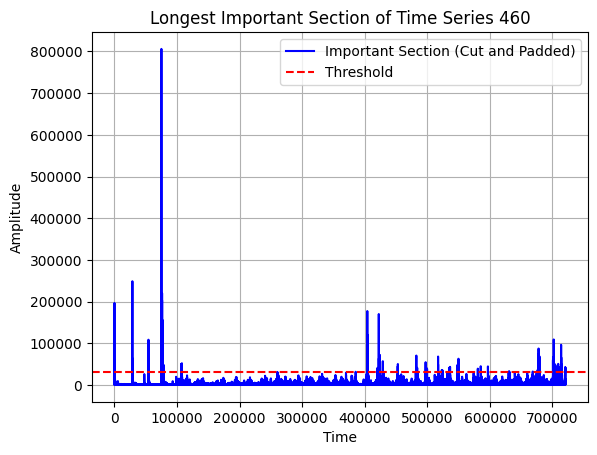

In [ ]:
"""
# Plot the section
plt.figure()
plt.plot(processed_data[longest_index], label='Important Section (Cut and Padded)', color='blue')
plt.axhline(y=threshold, color='red', linestyle='--', label='Threshold')
plt.title(f'Longest Important Section of Time Series {longest_index}')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
"""

XY Shape: (1094, 769025)
xy[0]: [   5.    0.    0. ... 1040.  912.  640.]
X[0]: [   0.    0.    0. ... 1040.  912.  640.]
y[0]: 5.0
coin 1: 151
coin 2: 170
coin 5: 130
coin 20: 137
coin 50: 130
coin 100: 180
coin 200: 196
Total: 1094


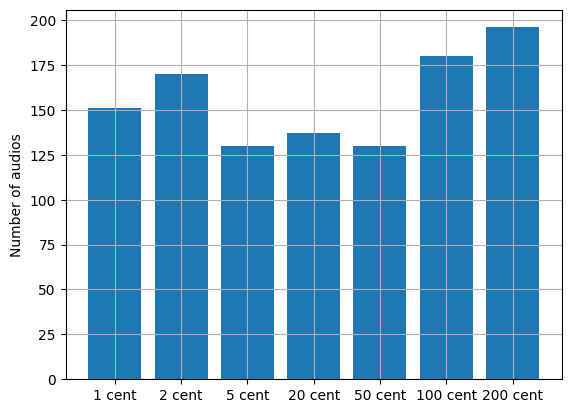

In [ ]:
print(f'XY Shape: {xy.shape}')
print(f'xy[0]: {xy[0]}')
print(f'X[0]: {X[0]}')
print(f'y[0]: {y[0]}')

coin_1 = 0
coin_2 = 0
coin_5 = 0
coin_20 = 0
coin_50 = 0
coin_100 = 0
coin_200 = 0
for i in range(xy.shape[0]):
    if xy[i,0] == 0:
        coin_1 += 1
    elif xy[i,0] == 1:
        coin_2 += 1
    elif xy[i,0] == 2:
        coin_5 += 1
    elif xy[i,0] == 3:
        coin_20 += 1
    elif xy[i,0] == 4:
        coin_50 += 1
    elif xy[i,0] == 5:
        coin_100 += 1
    elif xy[i,0] == 6:
        coin_200 += 1
print(f'coin 1: {coin_1}')
print(f'coin 2: {coin_2}')
print(f'coin 5: {coin_5}')
print(f'coin 20: {coin_20}')
print(f'coin 50: {coin_50}')
print(f'coin 100: {coin_100}')
print(f'coin 200: {coin_200}')
print(f'Total: {xy.shape[0]}')

x_ax = np.array([map[0], map[1], map[2], map[3], map[4], map[5], map[6]])
y_ax = np.array([coin_1, coin_2, coin_5, coin_20, coin_50, coin_100, coin_200])
plt.ylabel("Number of audios")
plt.bar(x_ax,y_ax)
plt.show()

In [173]:
# Handle Class Imbalance
#class_counts = torch.tensor([count_coin_1, count_coin_2, ..., count_coin_N], dtype=torch.float32)
#class_weights = 1.0 / class_counts  # Inverse frequency
#class_weights /= class_weights.sum()  # Normalize if necessary
#class_weights = class_weights.to(device)
#criterion = nn.CrossEntropyLoss(weight=class_weights)

In [39]:
# Set random seed for reproducibility
torch.manual_seed(7)  # Set the seed for generating random numbers in PyTorch
np.random.seed(7)     # Set the seed for generating random numbers in NumPy

In [175]:
# Define Hyper Parameters

hidden_size = 512
num_classes = 7
num_epochs = 500
batch_size = 8
learning_rate = 0.0001
num_layers = 2

input_size = 751  
sequence_length = 1024   
#input_size = 4 
#sequence_length = 28     



In [176]:

# Device config
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


Before normalization X_train[0]: [0. 0. 0. ... 0. 0. 0.]


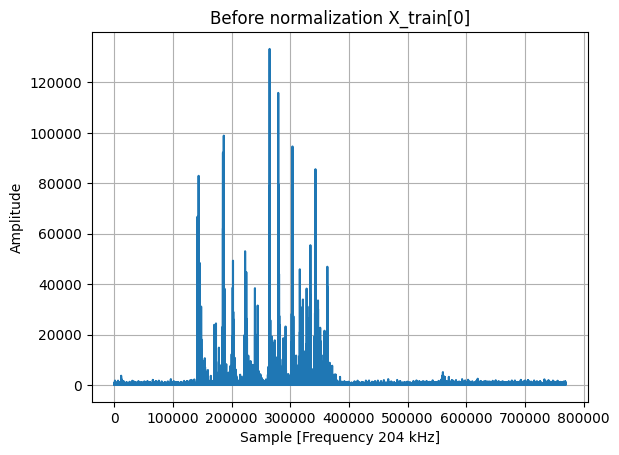

After normalization X_train[0]: [0. 0. 0. ... 0. 0. 0.]


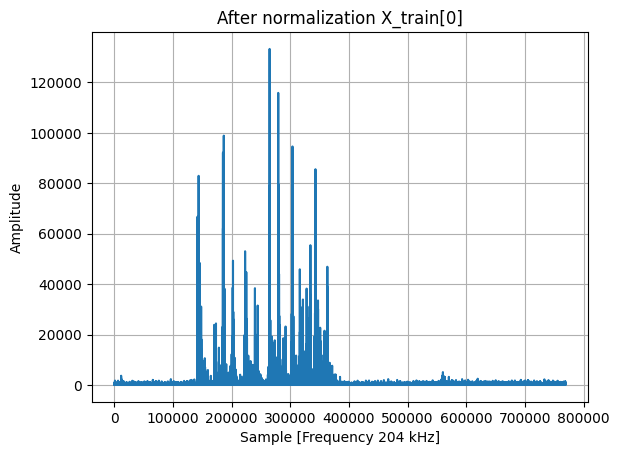

In [40]:
# Random State So it is reproducible
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Graph before normalization
print(f'Before normalization X_train[0]: {X_train[0]}')
plt.figure()
plt.title("Before normalization X_train[0]")
plt.xlabel("Sample [Frequency 204 kHz]")
plt.ylabel("Amplitude")
plt.grid()
plt.plot(X_train[0])
plt.show()

# Scale and split data
sc = MinMaxScaler(feature_range=(0,1))

# Per sample scaling
#X_train = np.array([sc.fit_transform(sample.reshape(-1, 1)).flatten() for sample in X_train])
#X_test = np.array([sc.fit_transform(sample.reshape(-1, 1)).flatten() for sample in X_test])

# Global scaling
# sc.fit_transform on X_train and sc.transform on X_test to avoid data leakage
#X_train = sc.fit_transform(X_train)
#X_test = sc.transform(X_test)

# Graph after scaling
print(f'After normalization X_train[0]: {X_train[0]}')
plt.figure()
plt.title("After normalization X_train[0]")
plt.xlabel("Sample [Frequency 204 kHz]")
plt.ylabel("Amplitude")
plt.grid()
plt.plot(X_train[0])
plt.show()

X_train[0]: [0. 0. 0. ... 0. 0. 0.]
y_train[0]: 6.0
X_test[0]: [160.  96.   0. ... 288.  32. 192.]
y_test[0]: 4.0
Train Set:
coin 1: 118
coin 2: 138
coin 5: 104
coin 20: 112
coin 50: 100
coin 100: 146
coin 200: 157
Total: 875


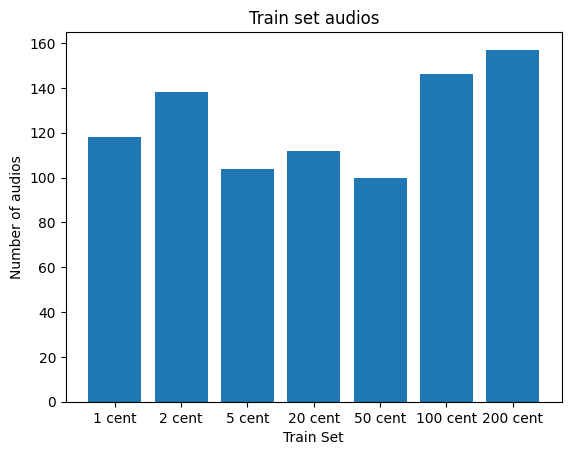

Test Set:
coin 1: 33
coin 2: 32
coin 5: 26
coin 20: 25
coin 50: 30
coin 100: 34
coin 200: 39
Total: 219


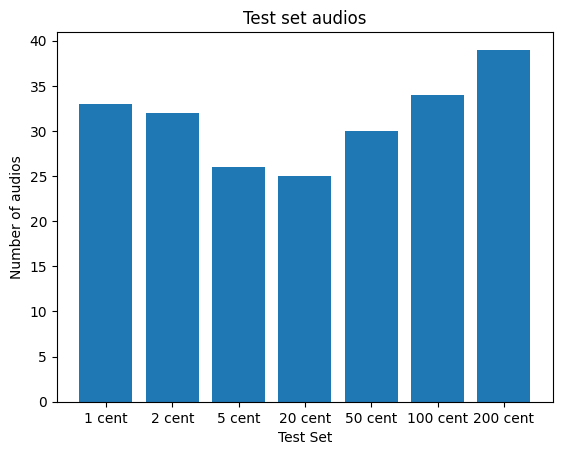

In [56]:
print(f'X_train[0]: {X_train[0]}')
print(f'y_train[0]: {y_train[0]}')
print(f'X_test[0]: {X_test[0]}')
print(f'y_test[0]: {y_test[0]}')

train_coin_1 = 0
train_coin_2 = 0
train_coin_5 = 0
train_coin_20 = 0
train_coin_50 = 0
train_coin_100 = 0
train_coin_200 = 0

for i in range(y_train.shape[0]):
    if y_train[i] == 0:
        train_coin_1 += 1
    elif y_train[i] == 1:
        train_coin_2 += 1
    elif y_train[i] == 2:
        train_coin_5 += 1
    elif y_train[i] == 3:
        train_coin_20 += 1
    elif y_train[i] == 4:
        train_coin_50 += 1
    elif y_train[i] == 5:
        train_coin_100 += 1
    elif y_train[i] == 6:
        train_coin_200 += 1

print("Train Set:")   
print(f'coin 1: {train_coin_1}')
print(f'coin 2: {train_coin_2}')
print(f'coin 5: {train_coin_5}')
print(f'coin 20: {train_coin_20}')
print(f'coin 50: {train_coin_50}')
print(f'coin 100: {train_coin_100}')
print(f'coin 200: {train_coin_200}')
print(f'Total: {y_train.shape[0]}')


x_ax = np.array([map[0], map[1], map[2], map[3], map[4], map[5], map[6]])
y_ax = np.array([train_coin_1, train_coin_2, train_coin_5, train_coin_20, train_coin_50, train_coin_100, train_coin_200])
plt.ylabel("Number of audios")
plt.xlabel("Train Set")
plt.bar(x_ax,y_ax)
plt.title("Train set audios")
plt.show()


test_coin_1 = 0
test_coin_2 = 0
test_coin_5 = 0
test_coin_20 = 0
test_coin_50 = 0
test_coin_100 = 0
test_coin_200 = 0
for i in range(y_test.shape[0]):
    if y_test[i] == 0:
        test_coin_1 += 1
    elif y_test[i] == 1:
        test_coin_2 += 1
    elif y_test[i] == 2:
        test_coin_5 += 1
    elif y_test[i] == 3:
        test_coin_20 += 1
    elif y_test[i] == 4:
        test_coin_50 += 1
    elif y_test[i] == 5:
        test_coin_100 += 1
    elif y_test[i] == 6:
        test_coin_200 += 1

print("Test Set:")
print(f'coin 1: {test_coin_1}')
print(f'coin 2: {test_coin_2}')
print(f'coin 5: {test_coin_5}')
print(f'coin 20: {test_coin_20}')
print(f'coin 50: {test_coin_50}')
print(f'coin 100: {test_coin_100}')
print(f'coin 200: {test_coin_200}')
print(f'Total: {y_test.shape[0]}')

x_ax = np.array([map[0], map[1], map[2], map[3], map[4], map[5], map[6]])
y_ax = np.array([test_coin_1, test_coin_2, test_coin_5, test_coin_20, test_coin_50, test_coin_100, test_coin_200])
plt.ylabel("Number of audios")
plt.xlabel("Test Set")
plt.title("Test set audios")
plt.bar(x_ax,y_ax)
plt.show()

In [179]:
# Creates TrainCoinDataSet
class TrainCoinDataSet(Dataset):

    def __init__(self, X_train, y_train):
        # Data Loading
        self.x = torch.from_numpy(X_train.astype(np.float32))
        self.y = torch.from_numpy(y_train).type(torch.LongTensor)
        self.n_samples = y_train.shape[0] # n_samples
        print(self.n_samples)

    def __getitem__(self, index):
        # Allows indexing
        return self.x[index], self.y[index]

    def __len__(self):
        # Allows calling length
        return self.n_samples
    
class TestCoinDataSet(Dataset):

    def __init__(self, X_test, y_test):
        # Data Loading
        self.x = torch.from_numpy(X_test.astype(np.float32))
        self.y = torch.from_numpy(y_test).type(torch.LongTensor)
        self.n_samples = y_test.shape[0] # n_samples
        print(self.n_samples)

    def __getitem__(self, index):
        # Allows indexing
        return self.x[index], self.y[index]

    def __len__(self):
        # Allows calling length
        return self.n_samples

In [180]:
# Creates Dataset
train_data = TrainCoinDataSet(X_train, y_train)
test_data = TestCoinDataSet(X_test, y_test)

875
219


In [181]:
print(train_data[0])
print(test_data[0])

(tensor([0., 0., 0.,  ..., 0., 0., 0.]), tensor(6))
(tensor([160.,  96.,   0.,  ..., 288.,  32., 192.]), tensor(4))


In [182]:
# Defines Train and Test Datasets sizes
#train_size = int(0.8 * len(dataset))  # 80% of the data will be used for training
#test_size = len(dataset) - train_size  # Remaining 20% will be used for test

# Split dataset into training set and test set
#train_data, test_data = random_split(dataset, [train_size, test_size])

# Creates Dataloaders for train and test datasets
train_loader = DataLoader(dataset=train_data, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=batch_size, shuffle=False)

examples = iter(train_loader)
samples, labels = next(examples)


In [183]:
print(f'Input shape: {samples.shape} , Labels shape: {labels.shape}')
print(f"Input range after standardization: Min = {samples[0].min()}, Max = {samples[0].max()}")
print(samples[0])
print(labels[0])
print(f'Input dtype: {samples[0,0].dtype}')
print(f'Label dtype: {labels[0].dtype}')
print(f'Labels: {labels}')

Input shape: torch.Size([8, 769024]) , Labels shape: torch.Size([8])
Input range after standardization: Min = 0.0, Max = 1023000.0
tensor([  0.,   0., 384.,  ...,   0.,   0.,   0.])
tensor(5)
Input dtype: torch.float32
Label dtype: torch.int64
Labels: tensor([5, 3, 4, 2, 2, 2, 1, 1])


In [184]:
# Create Model

# Model 
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, num_classes):
        super(LSTM, self).__init__()
        self.num_layers = num_layers
        self.hidden_size = hidden_size
        
        # x -> (batch_size, seq, input_size)
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True, dropout=0.5)
        self.fc = nn.Linear(hidden_size, num_classes)
        self.dropout = nn.Dropout(p=0.5)  # Inside LSTM clas

    def forward(self,x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size).to(device)

        out, _ = self.lstm(x, (h0,c0))

        # Dropout on output of LSTM
        out = self.dropout(out)

        # out: batch_size, seq_length, hidden_size
        # out (N, 6008, 128)
        # : all samples in batch, -1 last time step, : all features in hidden size

        out = out[:, -1, :] 
        
        # out (N, 128)
        out = self.fc(out)
        return out

In [185]:
model = LSTM(input_size, hidden_size, num_layers, num_classes).to(device)

# loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Learning Rate Scheduler (Reduce by factor of 0.1 every 10 epochs)
#scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=10, gamma=0.1)

# Reduces learning rate if loss plateaus
#scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=5)

In [186]:
print(model)

LSTM(
  (lstm): LSTM(751, 512, num_layers=2, batch_first=True, dropout=0.5)
  (fc): Linear(in_features=512, out_features=7, bias=True)
  (dropout): Dropout(p=0.5, inplace=False)
)


In [187]:
# Training loop

history = {'train_loss': [], 'val_loss': [], 'train_acc':[], 'val_acc': []}
all_preds = []
all_labels = []

train_loss_steps = []
train_acc_steps = []
running_loss_train_steps = 0.0
n_correct_train_steps = 0
n_samples_train_steps = 0

plot_steps, print_steps = 8,1

running_loss_train = 0.0
n_correct_train = 0
n_samples_train = 0

running_loss_val = 0.0
n_correct_val = 0
n_samples_val = 0

for epoch in range(num_epochs):
    
    model.train()
    running_loss_train = 0.0
    n_correct_train = 0
    n_samples_train = 0

    # Training loop
    for i, (inputs, labels) in enumerate(train_loader):
        
        inputs = inputs.reshape(-1, sequence_length, input_size).to(device)
        labels = labels.to(device)
        
        # Forward
        outputs = model(inputs)
        loss = criterion(outputs, labels)

        # Backward
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # For Epoch Graph
        running_loss_train += loss.item()
        _, predictions = torch.max(outputs, 1)
        n_correct_train += (predictions == labels).sum().item()
        n_samples_train += labels.shape[0]

        # For Steps Graph
        running_loss_train_steps += loss.item()
        _, predictions = torch.max(outputs, 1)
        n_correct_train_steps += (predictions == labels).sum().item()
        n_samples_train_steps += labels.shape[0]
        
        if (i+1) % print_steps == 0:
            print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{len(train_loader)}, loss = {loss.item():.4f}')

        if (i+1) % plot_steps == 0:
            train_loss_steps.append(running_loss_train_steps / len(train_loader))
            train_acc_steps.append(100 * n_correct_train_steps / n_samples_train_steps)
            running_loss_train_steps = 0.0
            n_correct_train_steps = 0
            n_samples_train_steps = 0


    history['train_loss'].append(running_loss_train / len(train_loader))
    history['train_acc'].append(100 * n_correct_train / n_samples_train)

    # Test loop

    running_loss_val = 0.0
    n_correct_val = 0
    n_samples_val = 0

    model.eval()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(test_loader):
            
            inputs = inputs.reshape(-1, sequence_length, input_size).to(device)
            labels = labels.to(device)
            
            # Forward
            outputs = model(inputs)
            loss = criterion(outputs, labels)

            # Accumulate loss
            running_loss_val += loss.item()
            _, predictions = torch.max(outputs, 1)
            n_correct_val += (predictions == labels).sum().item()
            n_samples_val += labels.shape[0]

            all_preds.extend(predictions.cpu().numpy())
            all_labels.extend(labels.cpu().numpy())

            if (i+1) % print_steps == 0:
                print(f'epoch {epoch+1} / {num_epochs}, step {i+1}/{len(test_loader)}, loss = {loss.item():.4f}')

        history['val_loss'].append(running_loss_val / len(test_loader))
        history['val_acc'].append(100 * n_correct_val / n_samples_val)

epoch 1 / 100, step 1/110, loss = 1.9263
epoch 1 / 100, step 2/110, loss = 1.9353
epoch 1 / 100, step 3/110, loss = 1.9457
epoch 1 / 100, step 4/110, loss = 1.9431
epoch 1 / 100, step 5/110, loss = 1.9910
epoch 1 / 100, step 6/110, loss = 1.9207
epoch 1 / 100, step 7/110, loss = 1.9927
epoch 1 / 100, step 8/110, loss = 1.9613
epoch 1 / 100, step 9/110, loss = 1.8948
epoch 1 / 100, step 10/110, loss = 1.9574
epoch 1 / 100, step 11/110, loss = 1.9853
epoch 1 / 100, step 12/110, loss = 1.9872
epoch 1 / 100, step 13/110, loss = 1.9685
epoch 1 / 100, step 14/110, loss = 2.0312
epoch 1 / 100, step 15/110, loss = 1.9573
epoch 1 / 100, step 16/110, loss = 1.9113
epoch 1 / 100, step 17/110, loss = 1.9407
epoch 1 / 100, step 18/110, loss = 1.9629
epoch 1 / 100, step 19/110, loss = 1.9605
epoch 1 / 100, step 20/110, loss = 1.9116
epoch 1 / 100, step 21/110, loss = 1.9306
epoch 1 / 100, step 22/110, loss = 1.9246
epoch 1 / 100, step 23/110, loss = 1.9350
epoch 1 / 100, step 24/110, loss = 1.9535
e

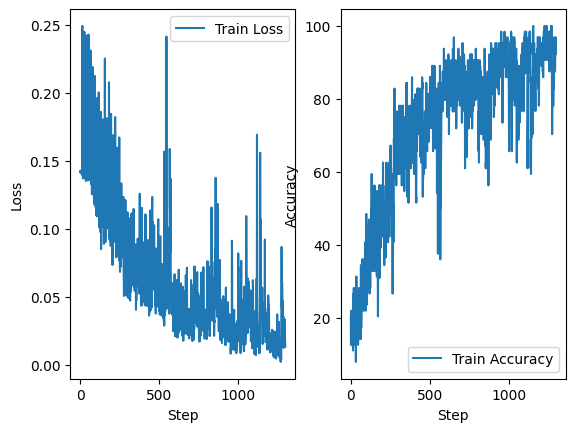

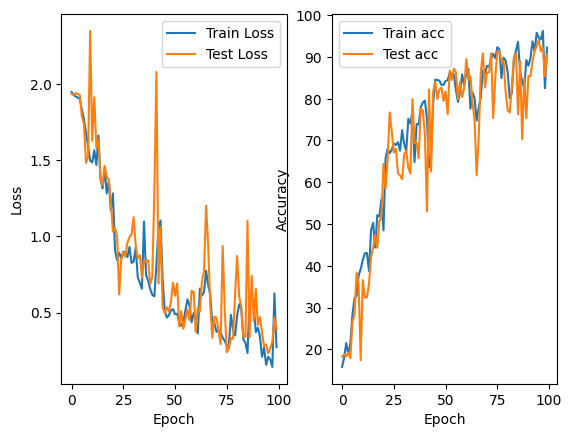

In [188]:
fig , ax = plt.subplots(1,2,sharex=True)

ax [0].plot(train_loss_steps, label='Train Loss')
ax [0].set_xlabel('Step')
ax [0].set_ylabel('Loss')
ax [0].legend()

ax [1].plot(train_acc_steps, label='Train Accuracy')
ax [1].set_xlabel('Step')
ax [1].set_ylabel('Accuracy')
ax [1].legend()

plt.savefig(results_dir + '/StepGraph.png')
plt.show() 

fig , ax = plt.subplots(1,2,sharex=True)

ax [0].plot(history['train_loss'], label='Train Loss')
ax [0].plot(history['val_loss'], label='Test Loss')
ax [0].set_xlabel('Epoch')
ax [0].set_ylabel('Loss')
ax [0].legend()

ax [1].plot(history['train_acc'], label='Train acc')
ax [1].plot(history['val_acc'], label='Test acc')
ax [1].set_xlabel('Epoch')
ax [1].set_ylabel('Accuracy')
ax [1].legend()

plt.savefig(results_dir + '/EpochGraph.png')
plt.show() 

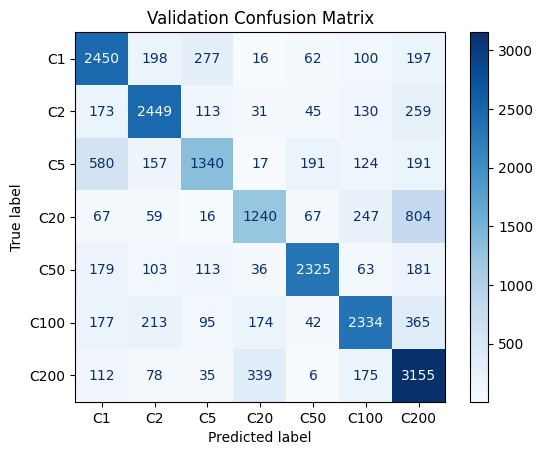

In [189]:
"""
Plot a confusion matrix using true and predicted labels.

Parameters:
    all_labels: List of true labels.
    all_preds: List of predicted labels.
    class_names: List of class names for labeling the confusion matrix.
"""
class_names = ['C1','C2','C5','C20','C50','C100','C200']
cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Validation Confusion Matrix")
disp.figure_.savefig(results_dir + 'Confusion_Matrix.png')
plt.show()


In [190]:
print(f"after {num_epochs} epochs the trainning accuracy is {history["train_acc"][-1]} and the test accuaracy is {history["val_acc"][-1]} ")

test_accuracy_max= max(history["val_acc"])
train_accuracy_max=max(history["train_acc"])

idx_max_test_accuracy=history["val_acc"].index(test_accuracy_max)

idx_max_train_accuracy=history["train_acc"].index(train_accuracy_max)

print(f" the maximum accuracy of the test was {max(history["val_acc"])} at the epoch {idx_max_test_accuracy}")

print(f" the maximum accuracy of the train was {max(history["train_acc"])} at the epoch {idx_max_train_accuracy}")

print(f"the accuracy of the training at the best validation accuracy {max(history["val_acc"])} is {history["train_acc"][idx_max_test_accuracy]}  ")

after 100 epochs the trainning accuracy is 92.22857142857143 and the test accuaracy is 90.41095890410959 
 the maximum accuracy of the test was 94.06392694063926 at the epoch 95
 the maximum accuracy of the train was 96.22857142857143 at the epoch 97
the accuracy of the training at the best validation accuracy 94.06392694063926 is 94.62857142857143  


In [193]:
print(model.state_dict())
torch.save(model.state_dict(), results_dir + "model_weights.pth")

# model.load_state_dict(torch.load(results_dir + "model_weights.pth"))


OrderedDict({'lstm.weight_ih_l0': tensor([[-0.0213, -0.0027, -0.0229,  ..., -0.0392, -0.0352,  0.0372],
        [ 0.0482,  0.0341, -0.0121,  ...,  0.0281, -0.0044, -0.0319],
        [-0.0300, -0.0242, -0.0275,  ..., -0.0052, -0.0334,  0.0122],
        ...,
        [-0.0104, -0.0276,  0.0120,  ..., -0.0081,  0.0039, -0.0274],
        [-0.0263, -0.0334, -0.0297,  ..., -0.0227,  0.0139, -0.0203],
        [ 0.0199, -0.0290,  0.0510,  ...,  0.0183,  0.0451,  0.0303]],
       device='cuda:0'), 'lstm.weight_hh_l0': tensor([[-0.0120, -0.0526,  0.0002,  ..., -0.0154, -0.0606,  0.0281],
        [ 0.0065, -0.0421, -0.0042,  ..., -0.0412,  0.0125,  0.0416],
        [ 0.0015,  0.0322, -0.0074,  ...,  0.0015,  0.0292, -0.0305],
        ...,
        [ 0.0338,  0.0282, -0.0074,  ..., -0.0300, -0.0586, -0.0220],
        [ 0.0107, -0.0261,  0.0195,  ..., -0.0250,  0.0559, -0.0055],
        [-0.0476, -0.0345,  0.0366,  ...,  0.0028,  0.0106, -0.0157]],
       device='cuda:0'), 'lstm.bias_ih_l0': tensor([

In [195]:
# Copy the 
shutil.copyfile('./lstm.ipynb', './' + results_dir + 'lstm_copy.ipynb')

'./David/Tests/16/lstm_copy.ipynb'